In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#解决中文问题

plt.rcParams['font.sans-serif']=['simHei']
plt.rcParams['axes.unicode_minus']=False

In [3]:
#读取数据
df_train=pd.read_csv('breast-cancer-train.csv')
df_train.head()  #1是恶性  0是良性

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,163,1,1,0
1,286,10,10,1
2,612,10,10,1
3,517,1,1,0
4,464,1,1,0


In [4]:
#查看数据缺失值  数据的条数  列数  数据类型

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524 entries, 0 to 523
Data columns (total 4 columns):
Unnamed: 0         524 non-null int64
Clump Thickness    524 non-null int64
Cell Size          524 non-null int64
Type               524 non-null int64
dtypes: int64(4)
memory usage: 16.5 KB


In [6]:
df_train.describe()  #数据分析

,Unnamed: 0,Clump Thickness,Cell Size,Type
count,524.000000,524.000000,524.000000,524.000000
mean,354.709924,3.167939,3.290076,0.351145
std,200.117623,3.046868,3.014277,0.477784
min,0.000000,1.000000,1.000000,0.000000
25%,179.750000,1.000000,1.000000,0.000000
50%,367.500000,1.000000,2.000000,0.000000
75%,526.250000,5.000000,5.000000,1.000000
max,698.000000,10.000000,10.000000,1.000000


In [11]:
#正负样本比列

neg_data=df_train[df_train['Type']==1] #恶
pos_data=df_train[df_train['Type']==0] #良

pos_len=len(pos_data)
neg_len=len(neg_data)

print("正样本记录数:{} , 所占比列数:{}".format(pos_len,pos_len/(pos_len+neg_len)))
print("负样本记录数:{} , 所占比列数:{}".format(neg_len,neg_len/(pos_len+neg_len)))


正样本记录数:340 , 所占比列数:0.648854961832061
负样本记录数:184 , 所占比列数:0.3511450381679389


In [12]:
#提取  type为0数据
df_train.loc[df_train['Type']==0].head()

,Unnamed: 0,Clump Thickness,Cell Size,Type
0,163,1,1,0
3,517,1,1,0
4,464,1,1,0
5,277,1,1,0
6,408,3,2,0


In [13]:
#提取type为0的两个列的数据
df_train.loc[df_train['Type']==0][['Clump Thickness','Cell Size']].head()

,Clump Thickness,Cell Size
0,1,1
3,1,1
4,1,1
5,1,1
6,3,2


In [14]:
#选取'clump thickness'与cellsize 作为特征 构建测试集中的正负分类样本
df_train_negative=df_train.loc[df_train['Type']==0][['Clump Thickness','Cell Size']]
df_train_positive=df_train.loc[df_train['Type']==1][['Clump Thickness','Cell Size']]

In [16]:
df_train_negative.head()

,Clump Thickness,Cell Size
0,1,1
3,1,1
4,1,1
5,1,1
6,3,2


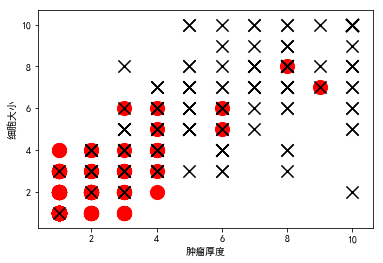

In [18]:
#绘制良性肿瘤样本点  标记为红色的 O  恶性的位  X

plt.scatter(df_train_negative['Clump Thickness'],df_train_negative['Cell Size'],marker='o',s=200,c='red')
plt.scatter(df_train_positive['Clump Thickness'],df_train_positive['Cell Size'],marker='x',s=150,c='black')
plt.xlabel('肿瘤厚度')
plt.ylabel('细胞大小')

plt.show()